In [91]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [92]:
dataset = pd.read_csv("titanic.csv")

In [93]:
#data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


missing data 
age cabin Embarked

model is based on ->pclass sex and fare and age

In [94]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex']) # 1 male and 0 female
dataset['Embarked'] = le.fit_transform(dataset['Embarked']) # 0->c 1->Q 2->S 

In [97]:
mean_age = round(dataset['Age'].mean())
mean_age

30

In [98]:
dataset['Age'] = dataset['Age'].fillna(mean_age)

In [99]:
x = dataset[['Pclass','Sex','Age','Fare']].values
y = dataset['Survived'].values

In [100]:
x_train,x_test,y_train,y_test  = train_test_split(x,y)

In [101]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [103]:
model.predict([[3,0,26,7.9250]])

array([0], dtype=int64)

In [104]:
model.score(x_test,y_test)

0.7757847533632287

In [105]:
new_dataset = dataset.drop('Name',axis='columns')

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033019 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.070657 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.329727  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084660 -0.114631   
Age             0.033019 -0.070657 -0.329727  0.084660  1.000000 -0.232440   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232440  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.180330  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.090632  0.159651   
Embarked        0.013083 -0.163517  0.157112  0.104057 -0.023657  0.066654   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.013083  
Survived     0.081629  0.257307 -0.163517  
Pclass       0.018443 -0.549500  0.157112  
Sex         -0.245489 -0.182333  0.104057  

<AxesSubplot:>

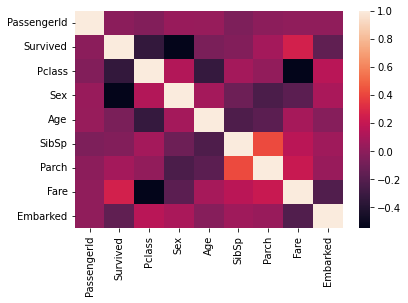

In [106]:
import seaborn as sns
data = new_dataset.corr()
print(data)
sns.heatmap(data=data)

In [117]:
piechart

NameError: name 'piechart' is not defined